In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import sklearn
import os
import time
from tensorflow import keras
#答应版本
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
# tf.test.is_gpu_available()

In [3]:
#导入数据
(x_train_all,y_train_all),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
#图片归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaler = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [7]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


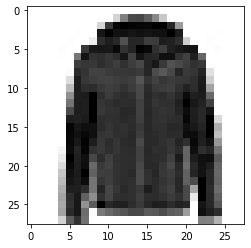

In [17]:
#显示图片
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    plt.show()
show_single_image(x_train[0])

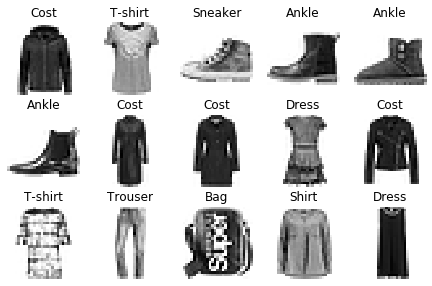

In [24]:
def show_images(n_rows,n_cols,x_data,y_data,class_name):
#     print(len(x_data))
#     print(len(y_data))
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.5,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',
                       interpolation= 'nearest')
            plt.axis('off')
            plt.title(class_name[y_data[index]])
    plt.show()
class_name = ['T-shirt','Trouser','Pullover','Dress','Cost',
                 'sandal','Shirt','Sneaker','Bag','Ankle','Boost']
show_images(3,5,x_train,y_train,class_name)   

In [8]:
#tf.keras.Sequential()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     model.add(keras.layers.Dense(300,activation='relu')),
#     model.add(keras.layers.Dense(100,activation='relu')),
#     model.add(keras.layers.Dense(10,activation='softmax')),
# ])

#relu : y  = max(0,x)
#softmax: 将向量变成概率分布 x = [x1,x2,x3] y = [e^x1/sum,e^x2/sum,e^x3/sum] sum = e^x1+e^x2+e^x

#loss 如果lable 是一个one-hot 向量 ：categorical_croossentropy，不是向量：sparse_categorical_crossentropy
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ["accuracy"])

In [29]:
model.layers

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaler,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 64us/sample - loss: 0.9388 - accuracy: 0.6968 - val_loss: 0.6346 - val_accuracy: 0.7816
Epoch 2/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.5854 - accuracy: 0.7984 - val_loss: 0.5349 - val_accuracy: 0.8146
Epoch 3/10
55000/55000 [==============================] - 5s 83us/sample - loss: 0.5157 - accuracy: 0.8195 - val_loss: 0.4892 - val_accuracy: 0.8336
Epoch 4/10
55000/55000 [==============================] - 4s 69us/sample - loss: 0.4779 - accuracy: 0.8331 - val_loss: 0.4613 - val_accuracy: 0.8438
Epoch 5/10
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4528 - accuracy: 0.8417 - val_loss: 0.4403 - val_accuracy: 0.8482
Epoch 6/10
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4342 - accuracy: 0.8476 - val_loss: 0.4255 - val_accuracy: 0.8540
Epoch 7/10
55000/55000 [==============================] -

In [33]:
type(history)

tensorflow.python.keras.callbacks.History

In [34]:
history.history

{'loss': [2.5254226215449247,
  0.6235507395440882,
  0.5251699236609719,
  0.48169727125601336,
  0.4509698021498593,
  0.4268565252520821,
  0.4092684781703082,
  0.3932087806073102,
  0.38276252418648116,
  0.37144331204674463],
 'accuracy': [0.68618184,
  0.77647275,
  0.80916363,
  0.8247273,
  0.83338183,
  0.842,
  0.8500909,
  0.8551273,
  0.8580727,
  0.8609818],
 'val_loss': [0.7407002458572388,
  0.6011532567977905,
  0.553410456264019,
  0.5230665961742401,
  0.5112821208477021,
  0.48106311588287354,
  0.4760354548454285,
  0.4838564211845398,
  0.46700162253379823,
  0.4621109206676483],
 'val_accuracy': [0.7694,
  0.8004,
  0.8104,
  0.829,
  0.8322,
  0.8402,
  0.8412,
  0.8392,
  0.8448,
  0.8432]}

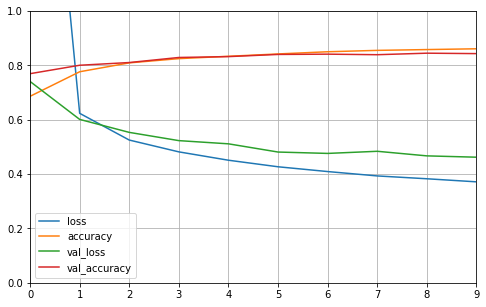

In [35]:
def plot_learning_curver(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curver(history)

In [14]:
#验证
model.evaluate(x_test_scaler,y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.4285 - accuracy: 0.8476


[0.4284779285430908, 0.8476]